In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#Import libararies and dataset roadaccidents.csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
#Import dataset

Road_Accidents = pd.read_csv("S:\\Semester1\\Python Project\\RoadAccidents.csv")
Road_Accidents.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,dt
0,A-641507,MapQuest,406,3,12/26/2019 17:09,1/10/2020 11:00,40.884850,-95.800362,NaN,NaN,...,False,False,False,False,False,Night,Day,Day,Day,12/26/2019
1,A-641508,MapQuest,406,3,12/26/2019 17:10,1/10/2020 11:00,40.889641,-95.798630,NaN,NaN,...,False,False,False,False,False,Night,Day,Day,Day,12/26/2019
2,A-740291,MapQuest,201,3,12/31/2019 23:49,1/1/2020 1:27,42.313499,-83.091225,NaN,NaN,...,False,False,False,False,False,Night,Night,Night,Night,12/31/2019
3,A-740293,MapQuest,201,2,12/31/2019 23:50,1/1/2020 1:24,42.398125,-83.109009,NaN,NaN,...,False,False,False,False,False,Night,Night,Night,Night,12/31/2019
4,A-740358,MapQuest,201,2,12/31/2019 23:29,1/1/2020 2:31,39.754967,-75.276283,NaN,NaN,...,False,False,False,False,False,Night,Night,Night,Night,12/31/2019


In [3]:
#Get the basic information about the dataset: shape and info() and column
Road_Accidents.shape
Road_Accidents.columns
Road_Accidents.info()
Road_Accidents.isnull().any().sum()
Road_Accidents.isna().sum()

(50366, 50)

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'dt'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50366 entries, 0 to 50365
Data columns (total 50 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     50366 non-null  object 
 1   Source                 50366 non-null  object 
 2   TMC                    50366 non-null  int64  
 3   Severity               50366 non-null  int64  
 4   Start_Time             50366 non-null  object 
 5   End_Time               50366 non-null  object 
 6   Start_Lat              50366 non-null  float64
 7   Start_Lng              50366 non-null  float64
 8   End_Lat                0 non-null      float64
 9   End_Lng                0 non-null      float64
 10  Distance(mi)           50366 non-null  float64
 11  Description            50366 non-null  object 
 12  Number                 20115 non-null  float64
 13  Street                 50366 non-null  object 
 14  Side                   50366 non-null  object 
 15  Ci

21

ID                           0
Source                       0
TMC                          0
Severity                     0
Start_Time                   0
End_Time                     0
Start_Lat                    0
Start_Lng                    0
End_Lat                  50366
End_Lng                  50366
Distance(mi)                 0
Description                  0
Number                   30251
Street                       0
Side                         0
City                         4
County                       0
State                        0
Zipcode                      9
Country                      0
Timezone                    52
Airport_Code                99
Weather_Timestamp          514
Temperature(F)             692
Wind_Chill(F)              949
Humidity(%)                809
Pressure(in)               572
Visibility(mi)             746
Wind_Direction             819
Wind_Speed(mph)            813
Precipitation(in)         2059
Weather_Condition          709
Amenity 

In [65]:
#What are the data types
Road_Accidents['Source'].dtype
Road_Accidents['Severity'].dtype
Road_Accidents['Distance(mi)'].dtype
Road_Accidents['Temperature(F)'].dtype
Road_Accidents['Pressure(in)'].dtype
Road_Accidents['Amenity'].dtype


dtype('O')

dtype('int64')

dtype('float64')

dtype('float64')

dtype('float64')

dtype('bool')

In [5]:
#Cast Start_Time to datetime
Road_Accidents["Start_Time"] = pd.to_datetime(Road_Accidents["Start_Time"])

# Extract year, month, weekday and day
Road_Accidents["Year"] = Road_Accidents["Start_Time"].dt.year
Road_Accidents["Month"] = Road_Accidents["Start_Time"].dt.month
Road_Accidents["Weekday"] = Road_Accidents["Start_Time"].dt.weekday
Road_Accidents["Day"] = Road_Accidents["Start_Time"].dt.day

# Extract hour and minute
Road_Accidents["Hour"] = Road_Accidents["Start_Time"].dt.hour
Road_Accidents["Minute"] = Road_Accidents["Start_Time"].dt.minute

Road_Accidents.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,dt,Year,Month,Weekday,Day,Hour,Minute
0,A-641507,MapQuest,406,3,2019-12-26 17:09:00,1/10/2020 11:00,40.884850,-95.800362,NaN,NaN,...,Day,Day,Day,12/26/2019,2019,12,3,26,17,9
1,A-641508,MapQuest,406,3,2019-12-26 17:10:00,1/10/2020 11:00,40.889641,-95.798630,NaN,NaN,...,Day,Day,Day,12/26/2019,2019,12,3,26,17,10
2,A-740291,MapQuest,201,3,2019-12-31 23:49:00,1/1/2020 1:27,42.313499,-83.091225,NaN,NaN,...,Night,Night,Night,12/31/2019,2019,12,1,31,23,49
3,A-740293,MapQuest,201,2,2019-12-31 23:50:00,1/1/2020 1:24,42.398125,-83.109009,NaN,NaN,...,Night,Night,Night,12/31/2019,2019,12,1,31,23,50
4,A-740358,MapQuest,201,2,2019-12-31 23:29:00,1/1/2020 2:31,39.754967,-75.276283,NaN,NaN,...,Night,Night,Night,12/31/2019,2019,12,1,31,23,29


In [7]:
#Source: reduce the number of source by summarizing them and turn it into dummies.

Road_Accidents['Source'].unique()

dummy_Source = pd.get_dummies(Road_Accidents, columns = ['Source'],drop_first = True)
dummy_Source

array(['MapQuest', 'MapQuest-Bing'], dtype=object)

,ID,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Nautical_Twilight,Astronomical_Twilight,dt,Year,Month,Weekday,Day,Hour,Minute,Source_MapQuest-Bing
0,A-641507,406,3,2019-12-26 17:09:00,1/10/2020 11:00,40.884850,-95.800362,NaN,NaN,1.63,...,Day,Day,12/26/2019,2019,12,3,26,17,9,0
1,A-641508,406,3,2019-12-26 17:10:00,1/10/2020 11:00,40.889641,-95.798630,NaN,NaN,1.67,...,Day,Day,12/26/2019,2019,12,3,26,17,10,0
2,A-740291,201,3,2019-12-31 23:49:00,1/1/2020 1:27,42.313499,-83.091225,NaN,NaN,0.00,...,Night,Night,12/31/2019,2019,12,1,31,23,49,0
3,A-740293,201,2,2019-12-31 23:50:00,1/1/2020 1:24,42.398125,-83.109009,NaN,NaN,0.00,...,Night,Night,12/31/2019,2019,12,1,31,23,50,0
4,A-740358,201,2,2019-12-31 23:29:00,1/1/2020 2:31,39.754967,-75.276283,NaN,NaN,0.00,...,Night,Night,12/31/2019,2019,12,1,31,23,29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50361,A-795145,201,2,2019-12-20 07:20:00,12/20/2019 8:20,35.816528,-78.600670,NaN,NaN,0.00,...,Day,Day,12/20/2019,2019,12,4,20,7,20,0
50362,A-795146,201,2,2019-12-20 07:28:00,12/20/2019 8:47,35.816055,-78.263321,NaN,NaN,0.00,...,Day,Day,12/20/2019,2019,12,4,20,7,28,0
50363,A-795147,201,2,2019-12-20 07:28:00,12/20/2019 8:12,37.574734,-77.461113,NaN,NaN,0.00,...,Day,Day,12/20/2019,2019,12,4,20,7,28,0
50364,A-795148,201,2,2019-12-20 07:38:00,12/20/2019 9:07,35.806160,-78.564659,NaN,NaN,0.00,...,Day,Day,12/20/2019,2019,12,4,20,7,38,0


In [8]:
#Time zone: split and turn them into dummy variables.

dummy_Source['Timezone'].unique()


l=[]
length=len(dummy_Source['Timezone'])
for i in dummy_Source['Timezone']:
    z=str(i).split('/')
    l.append(z)
l

dummy_Timezone = pd.get_dummies(dummy_Source, columns = ['Timezone'] ,drop_first = True)
dummy_Timezone

dummy_Timezone.rename(columns = {'US/Central':'Central', 'US/Eastern':'Eastern',
                              'US/Mountain':'Mountain','US/Pacific':'Pacific'}, inplace = True)
dummy_Timezone


array(['US/Central', 'US/Eastern', 'US/Pacific', 'US/Mountain', nan],
      dtype=object)

[['US', 'Central'],
 ['US', 'Central'],
 ['US', 'Eastern'],
 ['US', 'Eastern'],
 ['US', 'Eastern'],
 ['US', 'Pacific'],
 ['US', 'Pacific'],
 ['US', 'Pacific'],
 ['US', 'Pacific'],
 ['US', 'Pacific'],
 ['US', 'Pacific'],
 ['US', 'Pacific'],
 ['US', 'Pacific'],
 ['US', 'Pacific'],
 ['US', 'Pacific'],
 ['US', 'Pacific'],
 ['US', 'Pacific'],
 ['US', 'Pacific'],
 ['US', 'Eastern'],
 ['US', 'Eastern'],
 ['US', 'Eastern'],
 ['US', 'Eastern'],
 ['US', 'Eastern'],
 ['US', 'Eastern'],
 ['US', 'Eastern'],
 ['US', 'Eastern'],
 ['US', 'Eastern'],
 ['US', 'Eastern'],
 ['US', 'Eastern'],
 ['US', 'Eastern'],
 ['US', 'Eastern'],
 ['US', 'Eastern'],
 ['US', 'Eastern'],
 ['US', 'Eastern'],
 ['US', 'Eastern'],
 ['US', 'Eastern'],
 ['US', 'Eastern'],
 ['US', 'Eastern'],
 ['US', 'Eastern'],
 ['US', 'Eastern'],
 ['US', 'Eastern'],
 ['US', 'Eastern'],
 ['US', 'Eastern'],
 ['US', 'Eastern'],
 ['US', 'Eastern'],
 ['US', 'Eastern'],
 ['US', 'Eastern'],
 ['US', 'Eastern'],
 ['US', 'Eastern'],
 ['US', 'Eastern'],


,ID,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Year,Month,Weekday,Day,Hour,Minute,Source_MapQuest-Bing,Timezone_US/Eastern,Timezone_US/Mountain,Timezone_US/Pacific
0,A-641507,406,3,2019-12-26 17:09:00,1/10/2020 11:00,40.884850,-95.800362,NaN,NaN,1.63,...,2019,12,3,26,17,9,0,0,0,0
1,A-641508,406,3,2019-12-26 17:10:00,1/10/2020 11:00,40.889641,-95.798630,NaN,NaN,1.67,...,2019,12,3,26,17,10,0,0,0,0
2,A-740291,201,3,2019-12-31 23:49:00,1/1/2020 1:27,42.313499,-83.091225,NaN,NaN,0.00,...,2019,12,1,31,23,49,0,1,0,0
3,A-740293,201,2,2019-12-31 23:50:00,1/1/2020 1:24,42.398125,-83.109009,NaN,NaN,0.00,...,2019,12,1,31,23,50,0,1,0,0
4,A-740358,201,2,2019-12-31 23:29:00,1/1/2020 2:31,39.754967,-75.276283,NaN,NaN,0.00,...,2019,12,1,31,23,29,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50361,A-795145,201,2,2019-12-20 07:20:00,12/20/2019 8:20,35.816528,-78.600670,NaN,NaN,0.00,...,2019,12,4,20,7,20,0,1,0,0
50362,A-795146,201,2,2019-12-20 07:28:00,12/20/2019 8:47,35.816055,-78.263321,NaN,NaN,0.00,...,2019,12,4,20,7,28,0,1,0,0
50363,A-795147,201,2,2019-12-20 07:28:00,12/20/2019 8:12,37.574734,-77.461113,NaN,NaN,0.00,...,2019,12,4,20,7,28,0,1,0,0
50364,A-795148,201,2,2019-12-20 07:38:00,12/20/2019 9:07,35.806160,-78.564659,NaN,NaN,0.00,...,2019,12,4,20,7,38,0,1,0,0


,ID,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Year,Month,Weekday,Day,Hour,Minute,Source_MapQuest-Bing,Timezone_US/Eastern,Timezone_US/Mountain,Timezone_US/Pacific
0,A-641507,406,3,2019-12-26 17:09:00,1/10/2020 11:00,40.884850,-95.800362,NaN,NaN,1.63,...,2019,12,3,26,17,9,0,0,0,0
1,A-641508,406,3,2019-12-26 17:10:00,1/10/2020 11:00,40.889641,-95.798630,NaN,NaN,1.67,...,2019,12,3,26,17,10,0,0,0,0
2,A-740291,201,3,2019-12-31 23:49:00,1/1/2020 1:27,42.313499,-83.091225,NaN,NaN,0.00,...,2019,12,1,31,23,49,0,1,0,0
3,A-740293,201,2,2019-12-31 23:50:00,1/1/2020 1:24,42.398125,-83.109009,NaN,NaN,0.00,...,2019,12,1,31,23,50,0,1,0,0
4,A-740358,201,2,2019-12-31 23:29:00,1/1/2020 2:31,39.754967,-75.276283,NaN,NaN,0.00,...,2019,12,1,31,23,29,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50361,A-795145,201,2,2019-12-20 07:20:00,12/20/2019 8:20,35.816528,-78.600670,NaN,NaN,0.00,...,2019,12,4,20,7,20,0,1,0,0
50362,A-795146,201,2,2019-12-20 07:28:00,12/20/2019 8:47,35.816055,-78.263321,NaN,NaN,0.00,...,2019,12,4,20,7,28,0,1,0,0
50363,A-795147,201,2,2019-12-20 07:28:00,12/20/2019 8:12,37.574734,-77.461113,NaN,NaN,0.00,...,2019,12,4,20,7,28,0,1,0,0
50364,A-795148,201,2,2019-12-20 07:38:00,12/20/2019 9:07,35.806160,-78.564659,NaN,NaN,0.00,...,2019,12,4,20,7,38,0,1,0,0


In [63]:
#“Start_Lat”, “End_Lng”: Replace the missing of Number with mean.
dummy_Timezone['Start_Lat'].mean()
dummy_Timezone['Start_Lng'].mean()

dummy_Timezone['Start_Lat'].fillna(dummy_Timezone['Start_Lat'].mean(), inplace=True)
dummy_Timezone['Start_Lat'].isnull().any()


dummy_Timezone['Start_Lng'].fillna(dummy_Timezone['Start_Lng'].mean(), inplace=True)
dummy_Timezone['Start_Lng'].isnull().any()




36.30035538714583

-92.45777654473167

False

False

In [10]:
#“Wind_speed”, “visibility”, “pressure”, “humidity”,
#”Wind_direction:, “wind_chill”, “Temperature”, “weather_timestamp”: Replace the missing data with NaN value
dummy_Timezone['Temperature(F)'] = dummy_Timezone['Temperature(F)'].replace('',np.nan,regex=True)

#Wind_Chill = Road_Accidents['Wind_Chill(F)'].replace('',np.nan,regex=True)
#Wind_Chill

dummy_Timezone['THumidity(%)'] = dummy_Timezone['Humidity(%)'].replace('',np.nan,regex=True)


dummy_Timezone['Pressure(in)'] = dummy_Timezone['Pressure(in)'].replace('',np.nan,regex=True)


dummy_Timezone['Visibility(mi)'] = dummy_Timezone['Visibility(mi)'].replace('',np.nan,regex=True)


dummy_Timezone['Wind_Speed(mph)'] = dummy_Timezone['Wind_Speed(mph)'].replace('',np.nan,regex=True)
dummy_Timezone.head()


,ID,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Month,Weekday,Day,Hour,Minute,Source_MapQuest-Bing,Timezone_US/Eastern,Timezone_US/Mountain,Timezone_US/Pacific,THumidity(%)
0,A-641507,406,3,2019-12-26 17:09:00,1/10/2020 11:00,40.884850,-95.800362,NaN,NaN,1.63,...,12,3,26,17,9,0,0,0,0,85.0
1,A-641508,406,3,2019-12-26 17:10:00,1/10/2020 11:00,40.889641,-95.798630,NaN,NaN,1.67,...,12,3,26,17,10,0,0,0,0,85.0
2,A-740291,201,3,2019-12-31 23:49:00,1/1/2020 1:27,42.313499,-83.091225,NaN,NaN,0.00,...,12,1,31,23,49,0,1,0,0,92.0
3,A-740293,201,2,2019-12-31 23:50:00,1/1/2020 1:24,42.398125,-83.109009,NaN,NaN,0.00,...,12,1,31,23,50,0,1,0,0,92.0
4,A-740358,201,2,2019-12-31 23:29:00,1/1/2020 2:31,39.754967,-75.276283,NaN,NaN,0.00,...,12,1,31,23,29,0,1,0,0,53.0


In [11]:
#drop TMC
dummy_TMC = pd.get_dummies(dummy_Timezone, columns = ['TMC'] ,drop_first = True)
dummy_TMC.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,TMC_244,TMC_245,TMC_246,TMC_247,TMC_248,TMC_336,TMC_339,TMC_341,TMC_343,TMC_406
0,A-641507,3,2019-12-26 17:09:00,1/10/2020 11:00,40.884850,-95.800362,NaN,NaN,1.63,Entry ramp to I-29 Southbound from Waubonsie A...,...,0,0,0,0,0,0,0,0,0,1
1,A-641508,3,2019-12-26 17:10:00,1/10/2020 11:00,40.889641,-95.798630,NaN,NaN,1.67,Entry ramp to I-29 Northbound from Waubonsie A...,...,0,0,0,0,0,0,0,0,0,1
2,A-740291,3,2019-12-31 23:49:00,1/1/2020 1:27,42.313499,-83.091225,NaN,NaN,0.00,Lane blocked and left hand shoulder blocked du...,...,0,0,0,0,0,0,0,0,0,0
3,A-740293,2,2019-12-31 23:50:00,1/1/2020 1:24,42.398125,-83.109009,NaN,NaN,0.00,Lane blocked and right hand shoulder blocked d...,...,0,0,0,0,0,0,0,0,0,0
4,A-740358,2,2019-12-31 23:29:00,1/1/2020 2:31,39.754967,-75.276283,NaN,NaN,0.00,Right lane blocked due to accident on New Jers...,...,0,0,0,0,0,0,0,0,0,0


In [67]:
#Groupby weather condition and in which weather conditions does most accidents occur
Result1 = Road_Accidents.groupby('Weather_Condition')['ID'].count()
Result1

#Most of the accidents occured when the weather is Cloudy or Fair

Weather_Condition
Cloudy                         11706
Cloudy / Windy                   185
Drizzle                           60
Drizzle and Fog                   11
Fair                           18333
Fair / Windy                     160
Fog                             1482
Fog / Windy                       12
Freezing Rain                      4
Funnel Cloud                       1
Haze                             298
Haze / Windy                       1
Heavy Drizzle                     16
Heavy Rain                       262
Heavy Rain / Windy                12
Heavy Sleet                        6
Heavy Snow                        19
Heavy Snow / Windy                 5
Heavy T-Storm                     14
Light Drizzle                    309
Light Drizzle / Windy              4
Light Freezing Drizzle            11
Light Freezing Rain               37
Light Freezing Rain / Windy        2
Light Rain                      3364
Light Rain / Windy                94
Light Rain Shower   

<AxesSubplot:>

Text(0.5, 0, 'Accident Rates due to Weather Conditions')

Text(0, 0.5, 'number of accidents')

Text(0.5, 1.0, 'Weather Condition')

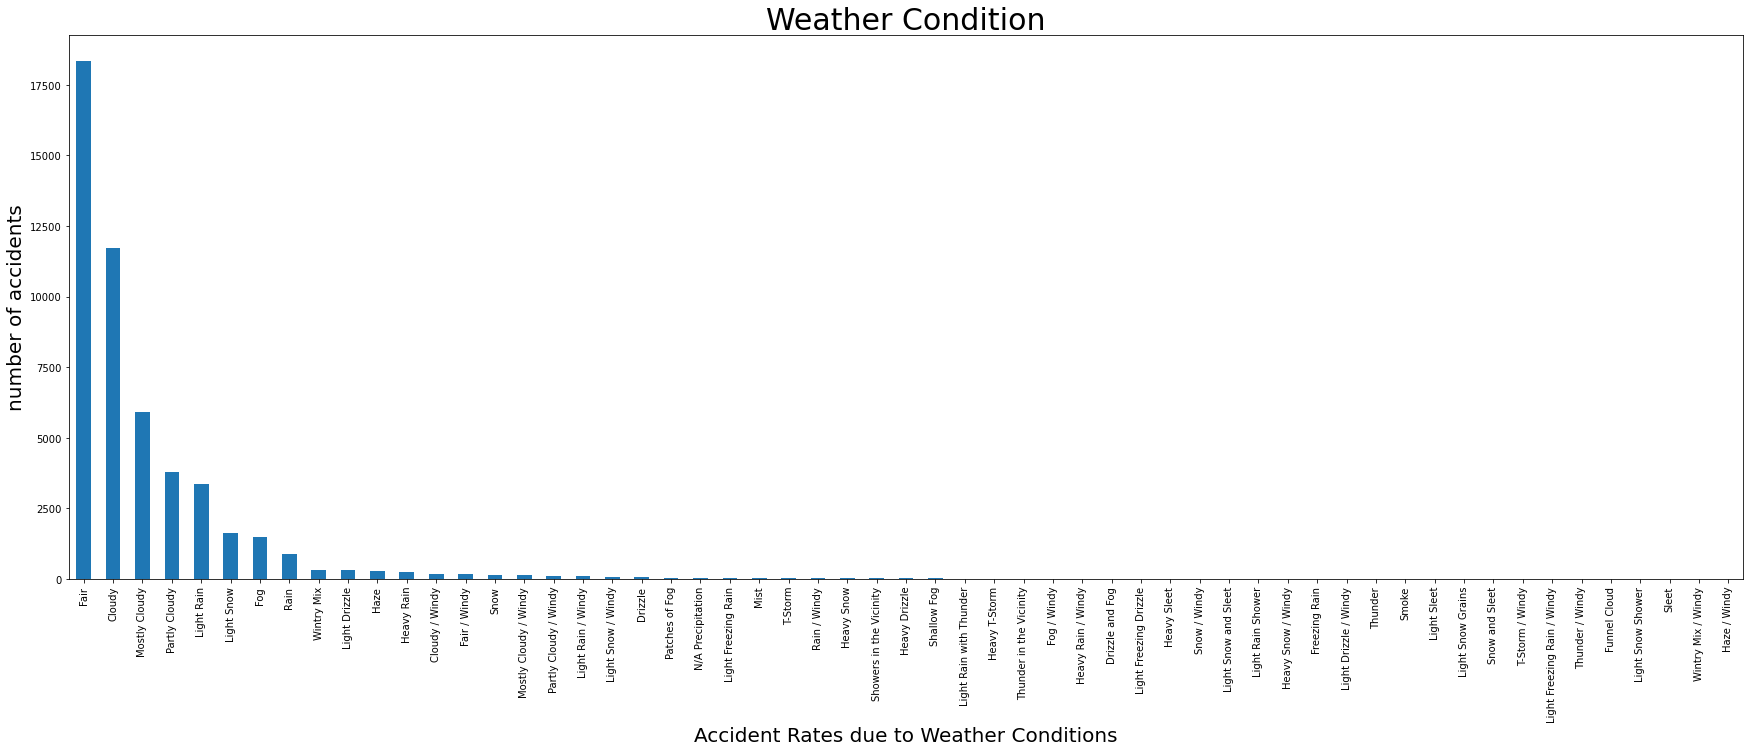

In [13]:
#Bar graph weather condition
Road_Accidents['Weather_Condition'].value_counts().plot(kind = 'bar', figsize=(30, 10))
plt.xlabel('Accident Rates due to Weather Conditions',fontsize=20)
plt.ylabel('number of accidents',fontsize=20)
plt.title('Weather Condition',fontsize=30)

The bar graph is indicating that number of accidents are high in 'Fair' weather condition

array(['Fair', 'Cloudy', 'Mostly Cloudy', 'Light Rain', 'Haze',
       'Partly Cloudy', 'Fog', nan, 'Partly Cloudy / Windy', 'Wintry Mix',
       'Light Snow', 'Rain', 'Snow', 'Heavy Rain',
       'Mostly Cloudy / Windy', 'Patches of Fog', 'Heavy Snow',
       'Heavy Rain / Windy', 'Light Drizzle', 'Light Freezing Rain',
       'Mist', 'Light Rain / Windy', 'Showers in the Vicinity', 'Drizzle',
       'T-Storm', 'Shallow Fog', 'Cloudy / Windy', 'Light Rain Shower',
       'N/A Precipitation', 'Freezing Rain', 'Light Rain with Thunder',
       'Rain / Windy', 'Thunder', 'Light Snow / Windy', 'Snow / Windy',
       'Heavy Drizzle', 'Fair / Windy', 'Snow and Sleet', 'Sleet',
       'Heavy T-Storm', 'Light Drizzle / Windy',
       'Light Freezing Rain / Windy', 'Light Sleet', 'Heavy Sleet',
       'Wintry Mix / Windy', 'Light Snow Shower', 'Smoke',
       'Drizzle and Fog', 'T-Storm / Windy', 'Funnel Cloud',
       'Thunder in the Vicinity', 'Heavy Snow / Windy',
       'Light Freezing Dri

<AxesSubplot:>

Text(0.5, 0, 'Accident Rates due to Weather Conditions')

Text(0, 0.5, 'number of accidents')

Text(0.5, 1.0, 'Weather Condition')

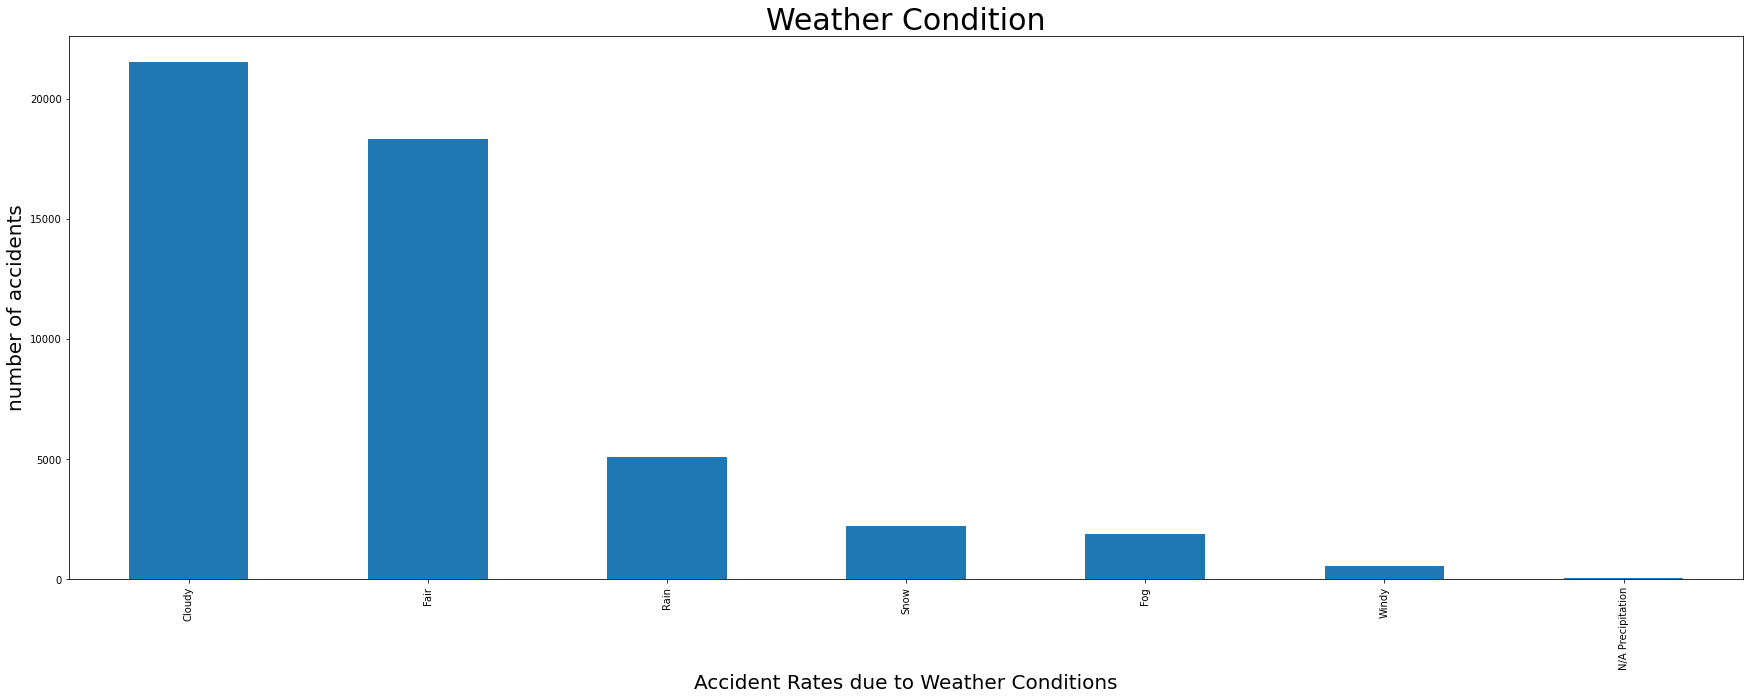

In [14]:
# replace weather conditions in simple terms with bar graph
dummy_TMC['Weather_Condition'].unique()
dummy_TMC['Weather_Condition'] = dummy_TMC['Weather_Condition'].replace(['Mostly Cloudy','Partly Cloudy','Mostly Cloudy / Windy','Funnel Cloud'],'Cloudy')

dummy_TMC['Weather_Condition'] = dummy_TMC['Weather_Condition'].replace(['Light Rain','Heavy Rain','Heavy Rain / Windy','Light Drizzle','Light Freezing Rain','Showers in the Vicinity','Drizzle','Light Rain Shower','T-Storm','Freezing Rain','Light Rain with Thunder','Rain / Windy','Thunder','Heavy Drizzle','Heavy T-Storm','T-Storm / Windy','Thunder in the Vicinity','Light Freezing Drizzle','Light Freezing Rain / Windy'],'Rain')

dummy_TMC['Weather_Condition'] = dummy_TMC['Weather_Condition'].replace(['Haze','Fog','Patches of Fog','Mist','Shallow Fog','Smoke','Drizzle and Fog','Fog / Windy','Haze / Windy'], 'Fog')

dummy_TMC['Weather_Condition'] = dummy_TMC['Weather_Condition'].replace(['Wintry Mix','Light Snow','Snow','Heavy Snow','Light Snow / Windy','Snow / Windy','Snow and Sleet','Sleet','Light Sleet','Heavy Sleet','Light Snow Shower','Heavy Snow / Windy','Light Snow and Sleet','Wintry Mix / Windy','Light Snow Grains'],'Snow')

dummy_TMC['Weather_Condition'] = dummy_TMC['Weather_Condition'].replace(['Partly Cloudy / Windy','Light Rain / Windy','Fair / Windy','Cloudy / Windy','Light Drizzle / Windy','Thunder / Windy'],'Windy')

dummy_TMC['Weather_Condition'].value_counts().plot(kind = 'bar', figsize=(30, 10))
plt.xlabel('Accident Rates due to Weather Conditions',fontsize=20)
plt.ylabel('number of accidents',fontsize=20)
plt.title('Weather Condition',fontsize=30)

In [15]:
#Analyse Accident Number Per Day of the Week
Result3 = Road_Accidents.groupby('Weekday')['ID'].count()
Result3.head()

Weekday
0    9778
1    9645
2    8750
3    8521
4    7672
Name: ID, dtype: int64

<AxesSubplot:>

Text(0.5, 0, 'weekday')

Text(0, 0.5, 'number of accidents')

Text(0.5, 1.0, 'Road accidents per weekday')

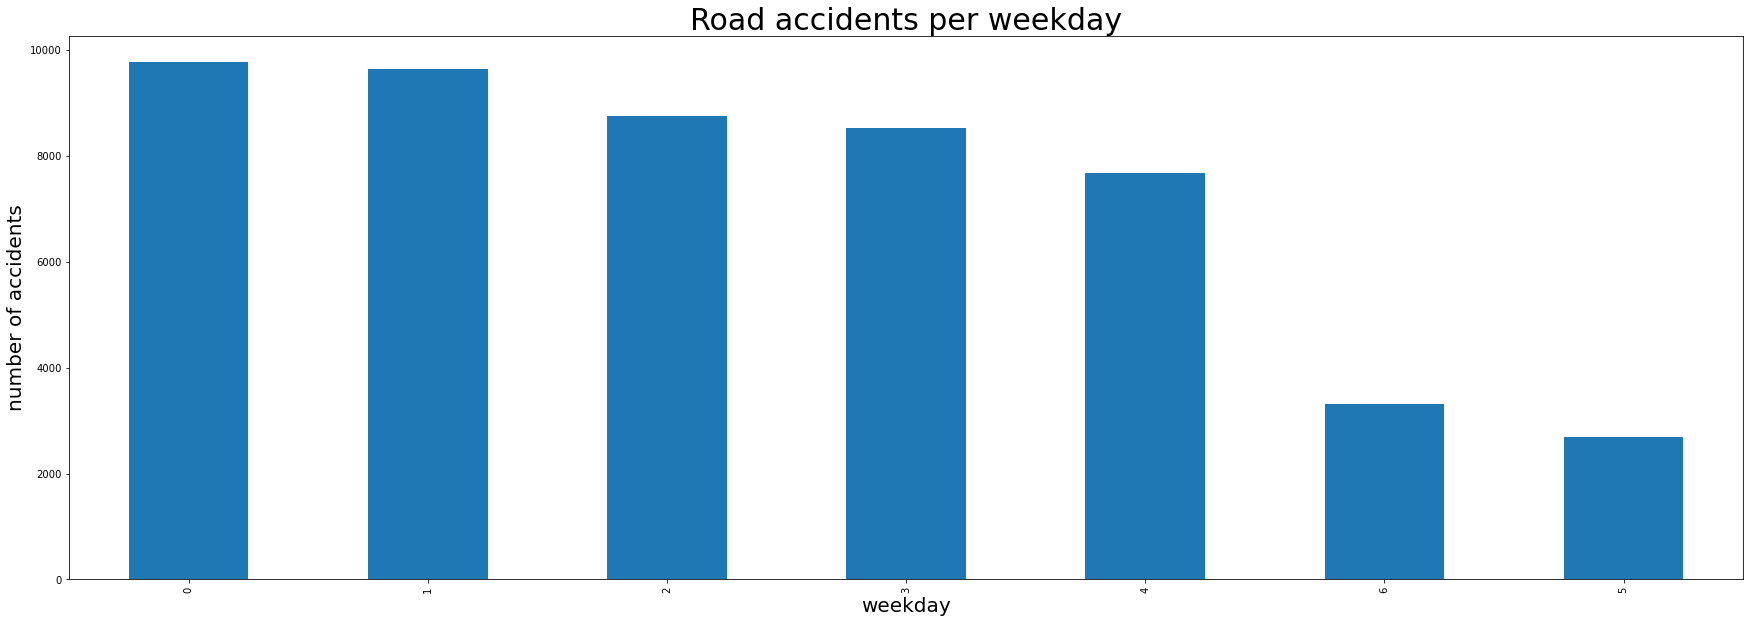

In [16]:
#Road accidents per weekday - bar plot
Road_Accidents['Weekday'].value_counts().plot(kind = 'bar', figsize=(30, 10))
plt.xlabel('weekday',fontsize=20)
plt.ylabel('number of accidents',fontsize=20)
plt.title('Road accidents per weekday',fontsize=30)

Weekdays resulted highest road accident rates whereas weekends resulted lowest.

In [17]:
#Which day dose accidents occur the most?
print('The Weekday when accidents usually occur the Most in the US? : ',Road_Accidents['Weekday'].value_counts().idxmax())
Road_Accidents['Weekday'].value_counts().sort_values(ascending=False)

The Weekday when accidents usually occur the Most in the US? :  0


0    9778
1    9645
2    8750
3    8521
4    7672
6    3315
5    2685
Name: Weekday, dtype: int64

In [18]:
#Analyse Accident Number Per Month
Result8 = Road_Accidents.groupby('Month')['ID'].count()
Result8

Month
11       30
12    50336
Name: ID, dtype: int64

<AxesSubplot:>

Text(0.5, 0, 'Month')

Text(0, 0.5, 'number of accidents')

Text(0.5, 1.0, 'Accidents count per month')

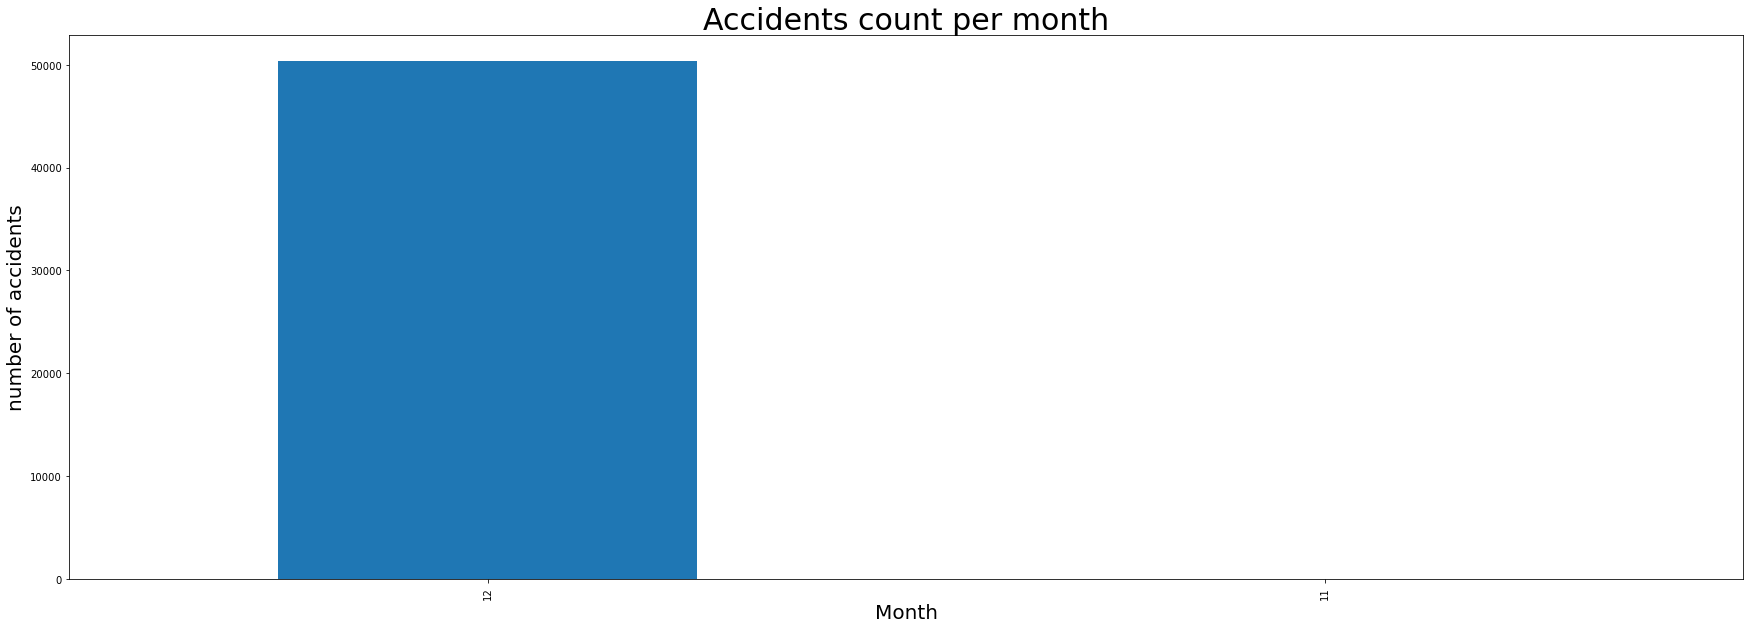

In [19]:
#Accidents count per month with a bar graph
Road_Accidents['Month'].value_counts().plot(kind = 'bar', figsize=(30, 10))
plt.xlabel('Month',fontsize=20)
plt.ylabel('number of accidents',fontsize=20)
plt.title('Accidents count per month',fontsize=30)

In [20]:
#Accidents count with a datatype State ID for Different states 
Result4 = Road_Accidents.groupby('State')['ID'].count()
Result4.head()

State
AL    1199
AR      13
AZ    1284
CA    7942
CO     728
Name: ID, dtype: int64

<AxesSubplot:>

Text(0.5, 0, 'State')

Text(0, 0.5, 'number of accidents')

Text(0.5, 1.0, 'Accidents count per State')

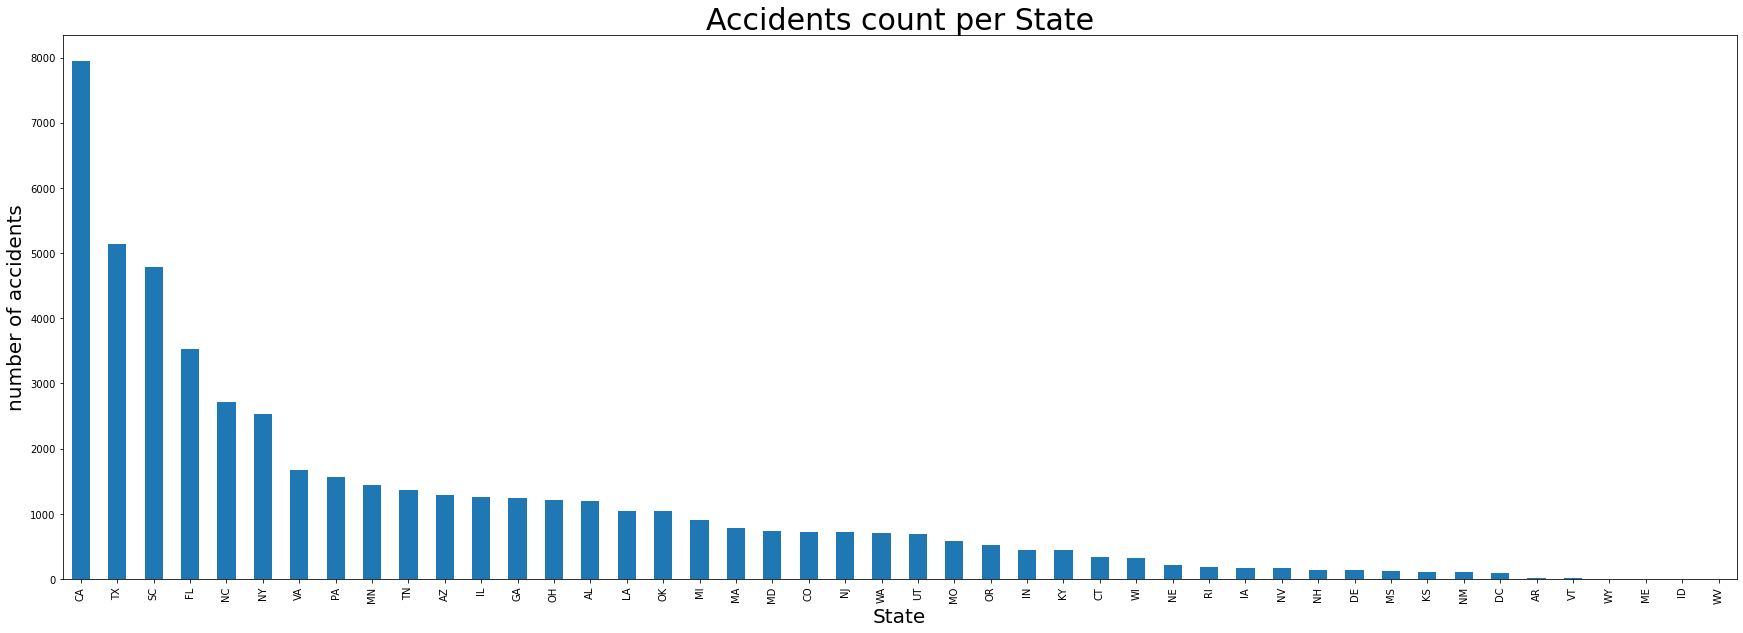

In [21]:
#Analyse Accidents count for particular state with a bar graph
Road_Accidents['State'].value_counts().plot(kind = 'bar', figsize=(30, 10))
plt.xlabel('State',fontsize=20)
plt.ylabel('number of accidents',fontsize=20)
plt.title('Accidents count per State',fontsize=30)

California has the highest number of accidents and texas state has second highest accident rate 

In [22]:
#Printing and analysing the data for most of the accidents happened in US and ranking the states in order with a count
print('The State where accidents usually occur the Most in the US? : ',Road_Accidents['State'].value_counts().idxmax())
print('The Rank of Accidents state wise is:\n ',Road_Accidents['State'].value_counts().sort_values(ascending=False))

The State where accidents usually occur the Most in the US? :  CA
The Rank of Accidents state wise is:
  CA    7942
TX    5144
SC    4787
FL    3527
NC    2720
NY    2538
VA    1666
PA    1565
MN    1440
TN    1367
AZ    1284
IL    1258
GA    1245
OH    1205
AL    1199
LA    1049
OK    1047
MI     912
MA     783
MD     731
CO     728
NJ     722
WA     706
UT     686
MO     580
OR     517
IN     452
KY     442
CT     344
WI     316
NE     211
RI     178
IA     171
NV     167
NH     143
DE     132
MS     122
KS     115
NM     108
DC      86
AR      13
VT       9
WY       4
ME       3
ID       1
WV       1
Name: State, dtype: int64


<Figure size 1440x1080 with 0 Axes>

Text(0.5, 1.0, 'Most Hits per Area')

Text(0.5, 0, 'Start Longitude')

Text(0, 0.5, 'Start Latitude')

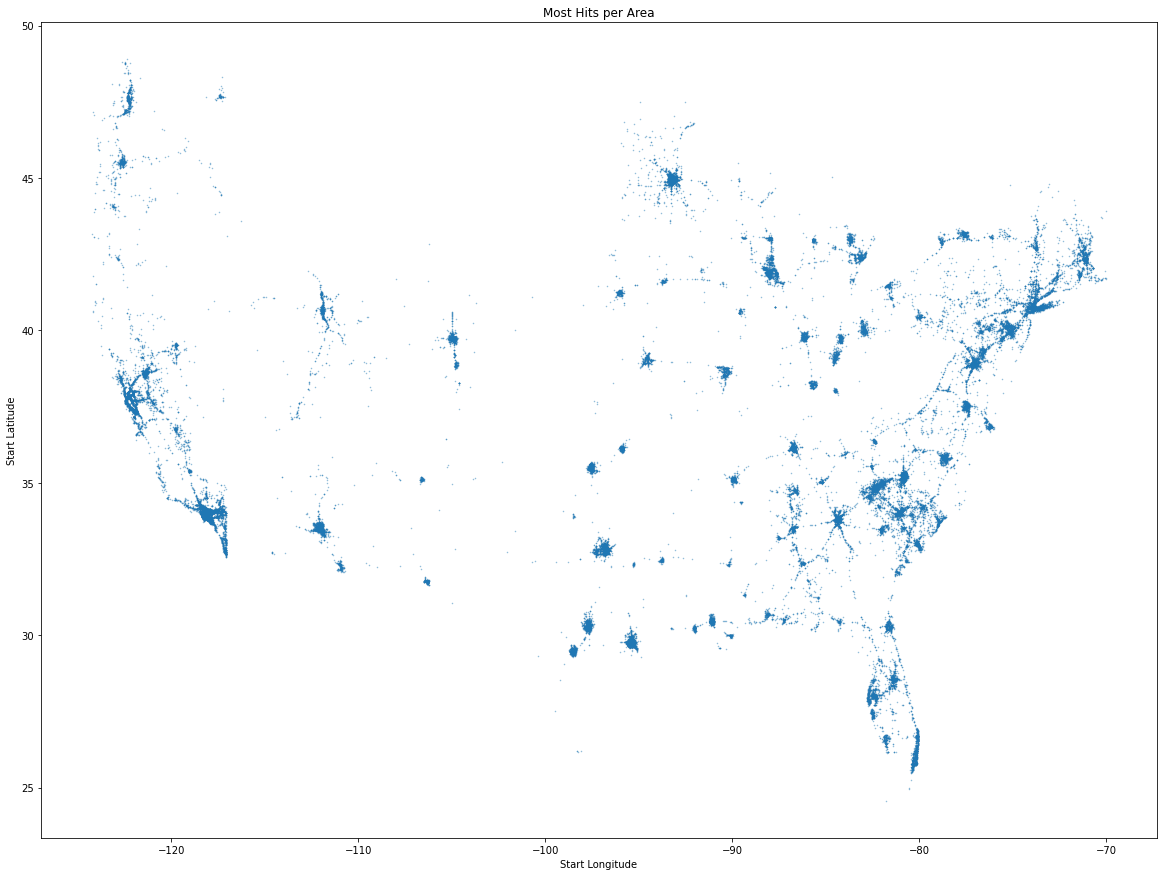

In [23]:
#plotting the Lat against Long could show the map of the area
plt.figure(figsize=(20,15))
plt.title('Most Hits per Area')
plt.xlabel('Start Longitude')
plt.ylabel('Start Latitude')
plt.plot(Road_Accidents.Start_Lng, Road_Accidents.Start_Lat, ".", alpha=0.5, ms=1)
plt.show()

Severity
1       18
2    35894
3    14090
4      364
Name: ID, dtype: int64

<AxesSubplot:>

Text(0.5, 0, 'Severity')

Text(0, 0.5, 'number of accidents')

Text(0.5, 1.0, 'Severity of Accidents count per State')

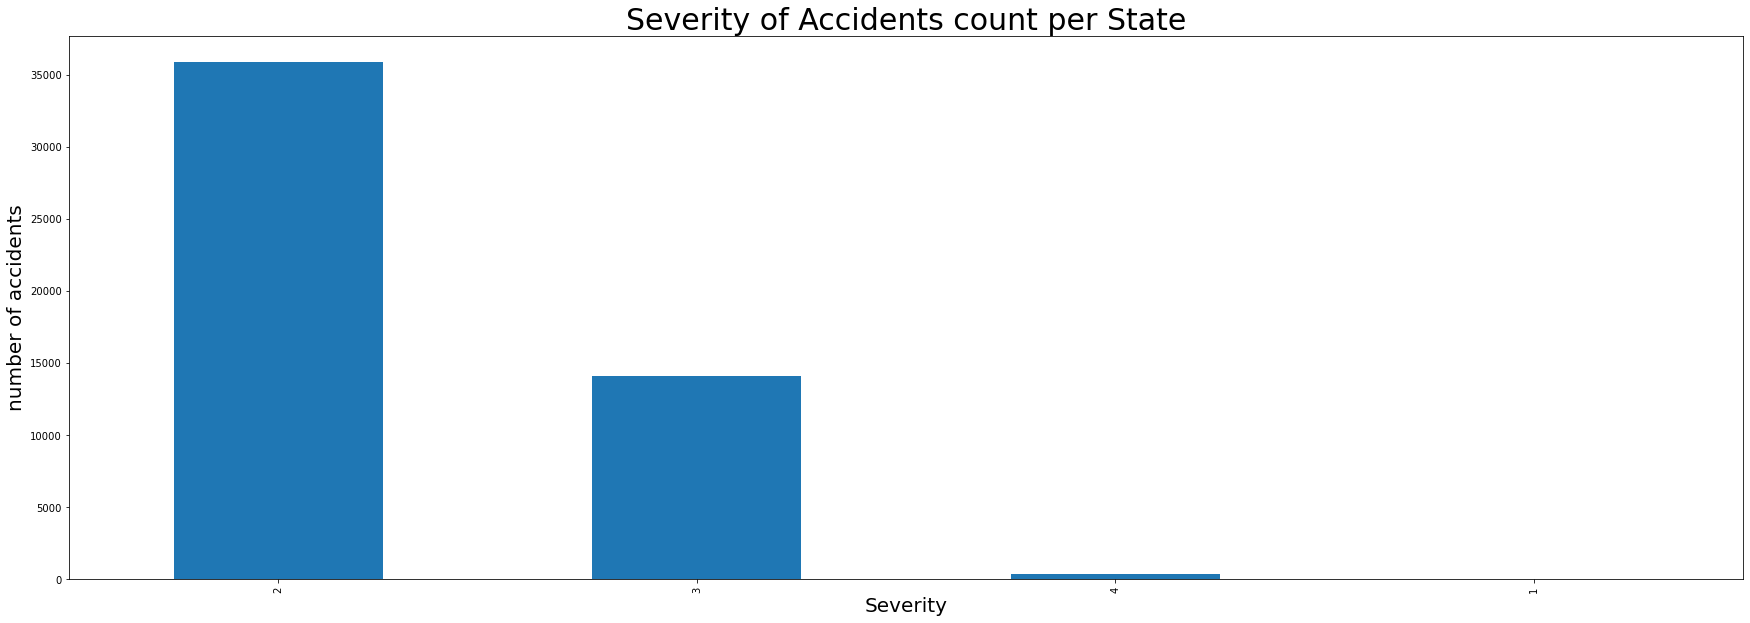

In [24]:
#Factors Affecting Accident Severity
#Examine the relationship between accident severity and other accident information such as time, weather, and location.
Result7 = Road_Accidents.groupby('Severity')['ID'].count()
Result7

Road_Accidents['Severity'].value_counts().plot(kind = 'bar', figsize=(30, 10))
plt.xlabel('Severity',fontsize=20)
plt.ylabel('number of accidents',fontsize=20)
plt.title('Severity of Accidents count per State',fontsize=30)

In [25]:
#classifying the severity as High and low, considering 1 and 2 as low, 3 and 4 as high. We are replacing 0 for low and 1 for high.

dummy_TMC['Severity'] = dummy_TMC['Severity'].replace([1,2],0)

dummy_TMC['Severity'] = dummy_TMC['Severity'].replace([3,4],1)

In [26]:
#Analysis of Accident Number Per County
Result5 = Road_Accidents.groupby('County')['ID'].count()
Result5.head()

County
Abbeville    13
Acadia        1
Accomack      1
Ada           1
Adams        89
Name: ID, dtype: int64

In [27]:
print('The County where accidents usually occur the Most in the US? : ',Road_Accidents['County'].value_counts().idxmax())
print('The Rank of Accidents County wise is:\n ',Road_Accidents['County'].value_counts().sort_values(ascending=False))

The County where accidents usually occur the Most in the US? :  Los Angeles
The Rank of Accidents County wise is:
  Los Angeles    2465
Harris         1504
Mecklenburg    1338
Dallas         1228
Travis         1197
               ... 
Liberty           1
Mesa              1
Wahkiakum         1
Loudon            1
Chaves            1
Name: County, Length: 894, dtype: int64


Wind_Direction
CALM    9578
E       2164
ENE     1721
ESE     1448
N       3618
Name: ID, dtype: int64

<AxesSubplot:>

Text(0.5, 0, 'Wind direction')

Text(0, 0.5, 'number of accidents')

Text(0.5, 1.0, 'Accidents due to weather direction')

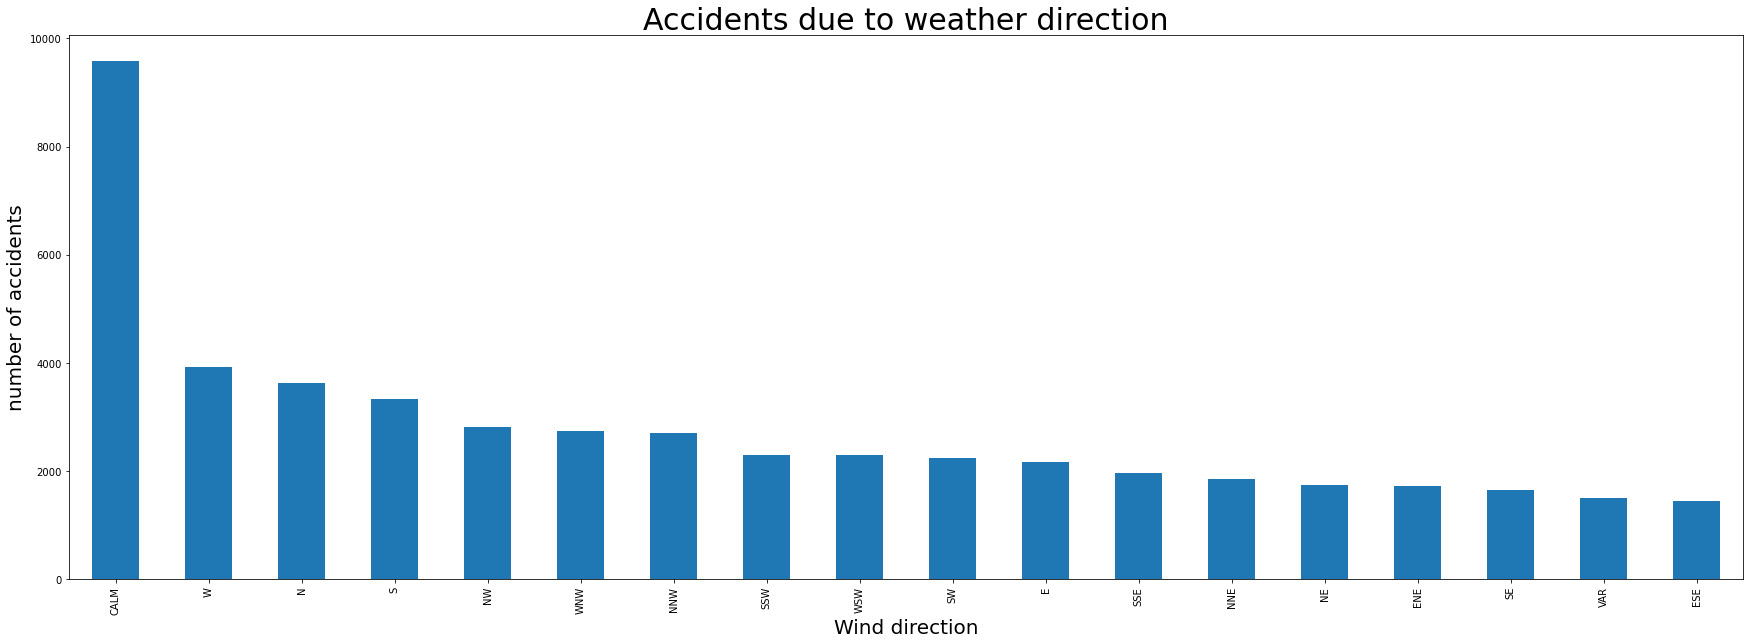

In [28]:
#Analyse Accident Number due to Weather Direction
Result6 = Road_Accidents.groupby('Wind_Direction')['ID'].count()
Result6.head()

Road_Accidents['Wind_Direction'].value_counts().plot(kind = 'bar', figsize=(30, 10))
plt.xlabel('Wind direction',fontsize=20)
plt.ylabel('number of accidents',fontsize=20)
plt.title('Accidents due to weather direction',fontsize=30)

Highest accident rate is observed in 'CALM' weather conditions.

<AxesSubplot:>

Text(0.5, 0, 'Wind direction')

Text(0, 0.5, 'number of accidents')

Text(0.5, 1.0, 'Accidents due to weather direction')

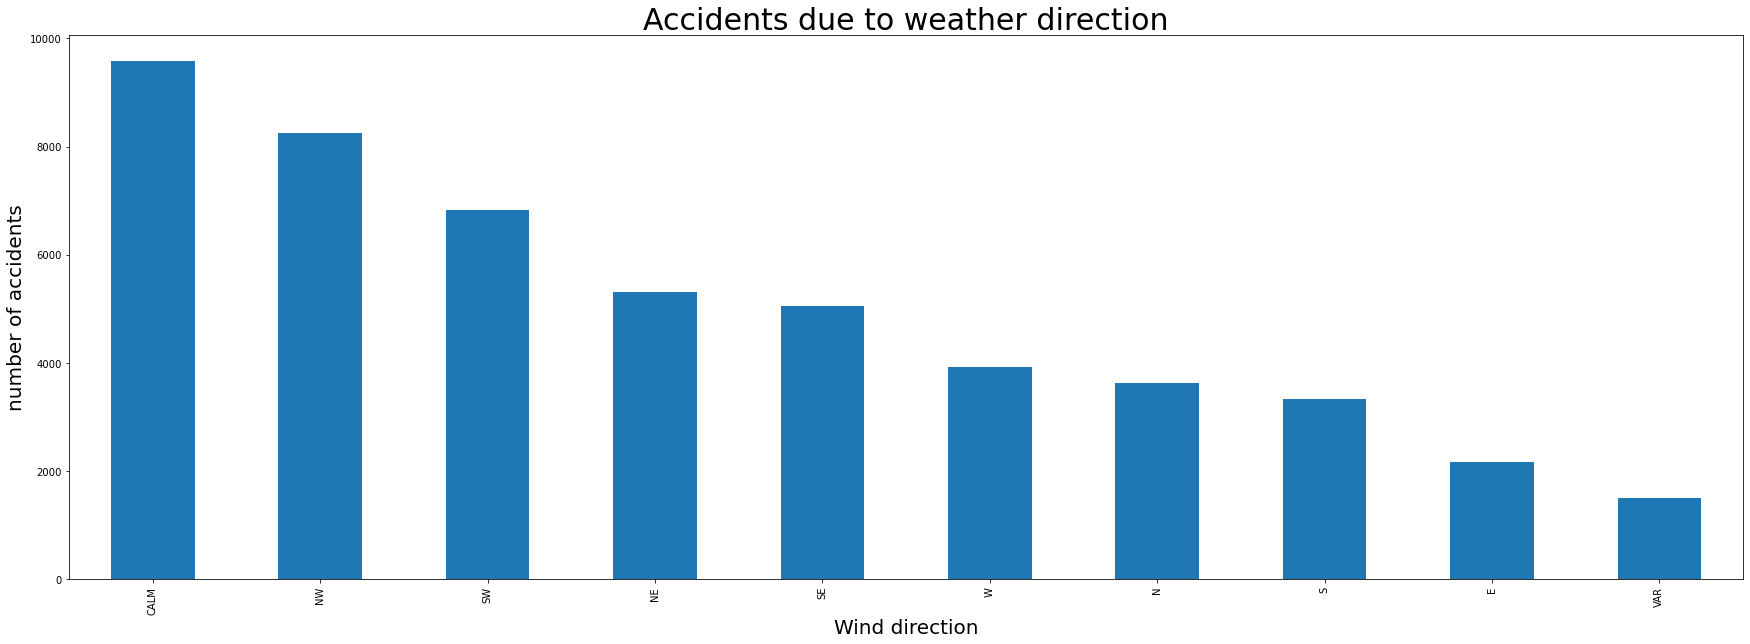

In [29]:
#Replacing the wind directions in simpler terms 
dummy_TMC['Wind_Direction'] = dummy_TMC['Wind_Direction'].replace(['WNW','NNW'],'NW')
dummy_TMC['Wind_Direction'] = dummy_TMC['Wind_Direction'].replace(['SSW','WSW'],'SW')
dummy_TMC['Wind_Direction'] = dummy_TMC['Wind_Direction'].replace(['SSE','ESE'],'SE')
dummy_TMC['Wind_Direction'] = dummy_TMC['Wind_Direction'].replace(['NNE','ENE'],'NE')
dummy_TMC['Wind_Direction'].value_counts().plot(kind = 'bar', figsize=(30, 10))

plt.xlabel('Wind direction',fontsize=20)
plt.ylabel('number of accidents',fontsize=20)
plt.title('Accidents due to weather direction',fontsize=30)

(array([2.400e+01, 1.300e+01, 3.120e+02, 7.230e+02, 7.000e+00, 4.000e+00,
        4.000e+00, 4.060e+02, 2.402e+03, 2.286e+03, 1.532e+03, 1.500e+03,
        5.430e+02, 1.197e+03, 4.120e+02, 2.176e+03, 2.076e+03, 1.944e+03,
        2.540e+03, 4.385e+03, 4.439e+03, 1.976e+03, 2.509e+03, 1.466e+03,
        2.187e+03, 9.230e+02, 1.044e+03, 5.600e+01, 0.000e+00, 0.000e+00,
        0.000e+00]),
 array([-110.        , -108.5483871 , -107.09677419, -105.64516129,
        -104.19354839, -102.74193548, -101.29032258,  -99.83870968,
         -98.38709677,  -96.93548387,  -95.48387097,  -94.03225806,
         -92.58064516,  -91.12903226,  -89.67741935,  -88.22580645,
         -86.77419355,  -85.32258065,  -83.87096774,  -82.41935484,
         -80.96774194,  -79.51612903,  -78.06451613,  -76.61290323,
         -75.16129032,  -73.70967742,  -72.25806452,  -70.80645161,
         -69.35483871,  -67.90322581,  -66.4516129 ,  -65.        ]),
 <BarContainer object of 31 artists>)

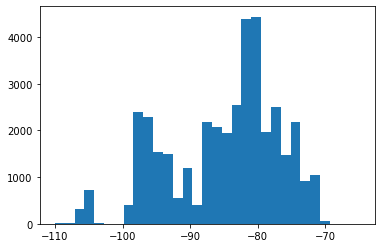

(array([ 725.,  213.,  687.,  608., 1009., 3405.,  745.,  352.,  922.,
        2933., 6773., 2904., 3606., 2595.,  693., 2425., 1829., 2440.,
        2828., 2765., 1837., 2097., 2096.,  649.,  200., 1314.,  445.,
          72.,  212.,  413.,   23.]),
 array([26.        , 26.74193548, 27.48387097, 28.22580645, 28.96774194,
        29.70967742, 30.4516129 , 31.19354839, 31.93548387, 32.67741935,
        33.41935484, 34.16129032, 34.90322581, 35.64516129, 36.38709677,
        37.12903226, 37.87096774, 38.61290323, 39.35483871, 40.09677419,
        40.83870968, 41.58064516, 42.32258065, 43.06451613, 43.80645161,
        44.5483871 , 45.29032258, 46.03225806, 46.77419355, 47.51612903,
        48.25806452, 49.        ]),
 <BarContainer object of 31 artists>)

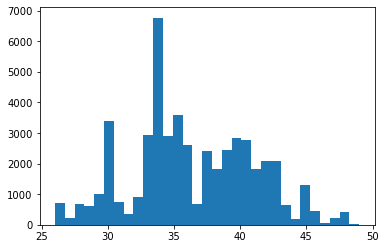

In [53]:
#Distribution of Latitudes and Longitudes
plt.hist(Road_Accidents.Start_Lng, bins=31, range=(-110, -65))
plt.show()

plt.hist(Road_Accidents.Start_Lat, bins=31, range=(26, 49))

<Figure size 720x360 with 0 Axes>

<AxesSubplot:ylabel='Severity'>

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,TMC_245,TMC_246,TMC_247,TMC_248,TMC_336,TMC_339,TMC_341,TMC_343,TMC_406,Sunrise_Sunset_Night
0,A-641507,1,2019-12-26 17:09:00,1/10/2020 11:00,40.884850,-95.800362,NaN,NaN,1.63,Entry ramp to I-29 Southbound from Waubonsie A...,...,0,0,0,0,0,0,0,0,1,1
1,A-641508,1,2019-12-26 17:10:00,1/10/2020 11:00,40.889641,-95.798630,NaN,NaN,1.67,Entry ramp to I-29 Northbound from Waubonsie A...,...,0,0,0,0,0,0,0,0,1,1
2,A-740291,1,2019-12-31 23:49:00,1/1/2020 1:27,42.313499,-83.091225,NaN,NaN,0.00,Lane blocked and left hand shoulder blocked du...,...,0,0,0,0,0,0,0,0,0,1
3,A-740293,0,2019-12-31 23:50:00,1/1/2020 1:24,42.398125,-83.109009,NaN,NaN,0.00,Lane blocked and right hand shoulder blocked d...,...,0,0,0,0,0,0,0,0,0,1
4,A-740358,0,2019-12-31 23:29:00,1/1/2020 2:31,39.754967,-75.276283,NaN,NaN,0.00,Right lane blocked due to accident on New Jers...,...,0,0,0,0,0,0,0,0,0,1


Text(0.5, 1.0, 'Accident Cases')

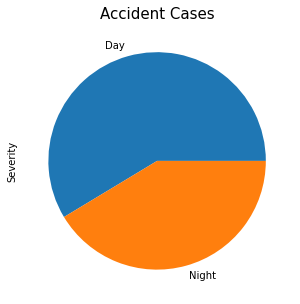

In [52]:
#Which State has highest accident cases is seen above
plt.figure(figsize =(10,5))
dummy_TMC.groupby(['Sunrise_Sunset'])['Severity'].size().sort_values(ascending=False).plot.pie()

dummy_sunset = pd.get_dummies(dummy_TMC, columns = ['Sunrise_Sunset'] ,drop_first = True)
dummy_sunset.head()
plt.title('Accident Cases',fontsize=15)

In [32]:
#Creating Dummies for Columns :('Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Railway','Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal','Turning_Loop','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight','Weather_Condition','Wind_Direction','Weekday')
dummy_sunset = pd.get_dummies(dummy_sunset, columns = ['Amenity'] ,drop_first = True)
dummy_sunset = pd.get_dummies(dummy_sunset, columns = ['Bump'] ,drop_first = True)
dummy_sunset = pd.get_dummies(dummy_sunset, columns = ['Crossing'] ,drop_first = True)
dummy_sunset = pd.get_dummies(dummy_sunset, columns = ['Give_Way'] ,drop_first = True)
dummy_sunset = pd.get_dummies(dummy_sunset, columns = ['Junction'] ,drop_first = True)
dummy_sunset = pd.get_dummies(dummy_sunset, columns = ['No_Exit'] ,drop_first = True)
dummy_sunset = pd.get_dummies(dummy_sunset, columns = ['Railway'] ,drop_first = True)
dummy_sunset = pd.get_dummies(dummy_sunset, columns = ['Roundabout'] ,drop_first = True)
dummy_sunset = pd.get_dummies(dummy_sunset, columns = ['Station'] ,drop_first = True)
dummy_sunset = pd.get_dummies(dummy_sunset, columns = ['Stop'] ,drop_first = True)
dummy_sunset = pd.get_dummies(dummy_sunset, columns = ['Traffic_Calming'] ,drop_first = True)
dummy_sunset = pd.get_dummies(dummy_sunset, columns = ['Traffic_Signal'] ,drop_first = True)
dummy_sunset = pd.get_dummies(dummy_sunset, columns = ['Turning_Loop'] ,drop_first = True)
dummy_sunset = pd.get_dummies(dummy_sunset, columns = ['Civil_Twilight'] ,drop_first = True)
dummy_sunset = pd.get_dummies(dummy_sunset, columns = ['Nautical_Twilight'] ,drop_first = True)
dummy_sunset = pd.get_dummies(dummy_sunset, columns = ['Astronomical_Twilight'] ,drop_first = True)
dummy_sunset = pd.get_dummies(dummy_sunset, columns = ['Weather_Condition'] ,drop_first = True)
dummy_sunset = pd.get_dummies(dummy_sunset, columns = ['Wind_Direction'] ,drop_first = True)
final_df = pd.get_dummies(dummy_sunset, columns = ['Weekday'] ,drop_first = True)


<Figure size 864x360 with 0 Axes>

<AxesSubplot:xlabel='Visibility(mi)'>

Text(0.5, 1.0, 'Visbility level')

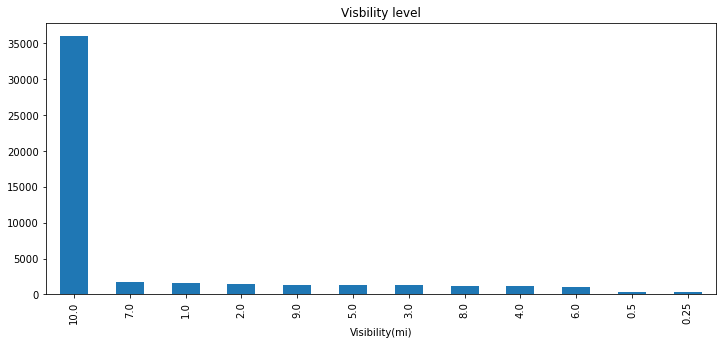

In [33]:
#How was the weather conditions during the accidents? Mostly clear...
plt.figure(figsize =(12,5))
Road_Accidents.groupby(['Visibility(mi)']).size().sort_values(ascending=False).head(12).plot.bar()
plt.title('Visbility level')

<AxesSubplot:ylabel='None'>

Text(0.5, 1.0, 'Proportion of accidents happened in weekday')

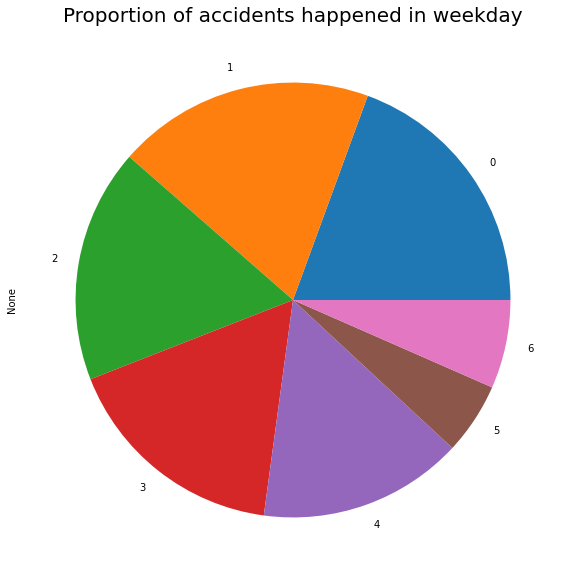

In [34]:
#Accidents happened in weekday with a pie diagram 
Road_Accidents.groupby(['Weekday']).size().plot.pie(figsize=(10,10))
plt.title('Proportion of accidents happened in weekday',fontsize=20)

Text(0.5, 1.0, 'Wind_Speed vs Temperature')

Text(0.5, 0, ' windspeed')

Text(0, 0.5, ' Temperature')

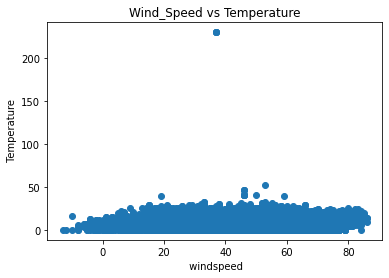

In [48]:
# scatter plot : wind_speed vs temperature

plt.scatter(Road_Accidents['Temperature(F)'], Road_Accidents['Wind_Speed(mph)']) 
plt.title('Wind_Speed vs Temperature')
plt.xlabel(' windspeed')
plt.ylabel(' Temperature')
plt.show()

 

In [36]:
#Dropping Columns
final_df = dummy_sunset
final_df.drop(['End_Lat', 'End_Lng', 'Number', 'Description','Street','Side', 'City', 'County', 'State','Zipcode','Country', 'Airport_Code','Start_Time','End_Time','dt','Weather_Timestamp','ID','Year','Month','Day','Hour','Minute','Source_MapQuest-Bing','Timezone_US/Eastern','Timezone_US/Mountain','Timezone_US/Pacific'], axis=1, inplace=True)
final_df.dropna(axis=0)
final_df.info()

,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),...,Weather_Condition_Windy,Wind_Direction_E,Wind_Direction_N,Wind_Direction_NE,Wind_Direction_NW,Wind_Direction_S,Wind_Direction_SE,Wind_Direction_SW,Wind_Direction_VAR,Wind_Direction_W
0,1,40.884850,-95.800362,1.63,31.0,31.0,85.0,28.84,10.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1,40.889641,-95.798630,1.67,31.0,31.0,85.0,28.84,10.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,1,42.313499,-83.091225,0.00,28.0,17.0,92.0,29.06,7.0,13.0,...,0,0,0,0,0,0,0,1,0,0
3,0,42.398125,-83.109009,0.00,28.0,17.0,92.0,29.06,7.0,13.0,...,0,0,0,0,0,0,0,1,0,0
4,0,39.754967,-75.276283,0.00,43.0,36.0,53.0,29.68,10.0,14.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50361,0,35.816528,-78.600670,0.00,26.0,26.0,75.0,30.04,10.0,0.0,...,0,0,0,0,0,0,0,0,0,0
50362,0,35.816055,-78.263321,0.00,23.0,23.0,93.0,30.15,10.0,0.0,...,0,0,0,0,0,0,0,0,0,0
50363,0,37.574734,-77.461113,0.00,21.0,21.0,85.0,30.32,8.0,0.0,...,0,0,0,0,0,0,0,0,0,0
50364,0,35.806160,-78.564659,0.00,26.0,26.0,81.0,30.06,10.0,0.0,...,0,0,0,0,0,0,0,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50366 entries, 0 to 50365
Data columns (total 61 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Severity                             50366 non-null  int64  
 1   Start_Lat                            50366 non-null  float64
 2   Start_Lng                            50366 non-null  float64
 3   Distance(mi)                         50366 non-null  float64
 4   Temperature(F)                       49674 non-null  float64
 5   Wind_Chill(F)                        49417 non-null  float64
 6   Humidity(%)                          49557 non-null  float64
 7   Pressure(in)                         49794 non-null  float64
 8   Visibility(mi)                       49620 non-null  float64
 9   Wind_Speed(mph)                      49553 non-null  float64
 10  Precipitation(in)                    48307 non-null  float64
 11  Weekday                     

In [58]:
#ID: Remove “A-” from ID 

Road_Accidents['ID'].unique()
Road_Accidents['ID'] = Road_Accidents['ID'].str.replace('A-','')
Road_Accidents['ID'].head()

array(['A-641507', 'A-641508', 'A-740291', ..., 'A-795147', 'A-795148',
       'A-795149'], dtype=object)

0    641507
1    641508
2    740291
3    740293
4    740358
Name: ID, dtype: object

In [59]:
Road_Accidents

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,dt,Year,Month,Weekday,Day,Hour,Minute
0,641507,MapQuest,406,3,2019-12-26 17:09:00,1/10/2020 11:00,40.884850,-95.800362,NaN,NaN,...,Day,Day,Day,12/26/2019,2019,12,3,26,17,9
1,641508,MapQuest,406,3,2019-12-26 17:10:00,1/10/2020 11:00,40.889641,-95.798630,NaN,NaN,...,Day,Day,Day,12/26/2019,2019,12,3,26,17,10
2,740291,MapQuest,201,3,2019-12-31 23:49:00,1/1/2020 1:27,42.313499,-83.091225,NaN,NaN,...,Night,Night,Night,12/31/2019,2019,12,1,31,23,49
3,740293,MapQuest,201,2,2019-12-31 23:50:00,1/1/2020 1:24,42.398125,-83.109009,NaN,NaN,...,Night,Night,Night,12/31/2019,2019,12,1,31,23,50
4,740358,MapQuest,201,2,2019-12-31 23:29:00,1/1/2020 2:31,39.754967,-75.276283,NaN,NaN,...,Night,Night,Night,12/31/2019,2019,12,1,31,23,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50361,795145,MapQuest,201,2,2019-12-20 07:20:00,12/20/2019 8:20,35.816528,-78.600670,NaN,NaN,...,Day,Day,Day,12/20/2019,2019,12,4,20,7,20
50362,795146,MapQuest,201,2,2019-12-20 07:28:00,12/20/2019 8:47,35.816055,-78.263321,NaN,NaN,...,Day,Day,Day,12/20/2019,2019,12,4,20,7,28
50363,795147,MapQuest,201,2,2019-12-20 07:28:00,12/20/2019 8:12,37.574734,-77.461113,NaN,NaN,...,Day,Day,Day,12/20/2019,2019,12,4,20,7,28
50364,795148,MapQuest,201,2,2019-12-20 07:38:00,12/20/2019 9:07,35.806160,-78.564659,NaN,NaN,...,Day,Day,Day,12/20/2019,2019,12,4,20,7,38


In [37]:
# generate the independent variable and dependent variable
final_df = final_df.dropna()
((final_df.corr() > 0.7)&(final_df.corr() < 0.98) ).any()
# few columns has high correlation of more than 0.7, so droping one of those highly correlated columns.

X = final_df.drop(['Severity','Nautical_Twilight_Night','Sunrise_Sunset_Night','Traffic_Calming_True'], axis = 1)

((X.corr() > 0.7)&(X.corr() < 0.98) ).any()

y = final_df['Severity']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30)


Severity              False
Start_Lat             False
Start_Lng             False
Distance(mi)          False
Temperature(F)        False
                      ...  
Wind_Direction_S      False
Wind_Direction_SE     False
Wind_Direction_SW     False
Wind_Direction_VAR    False
Wind_Direction_W      False
Length: 61, dtype: bool

Start_Lat                              False
Start_Lng                              False
Distance(mi)                           False
Temperature(F)                         False
Wind_Chill(F)                          False
Humidity(%)                            False
Pressure(in)                           False
Visibility(mi)                         False
Wind_Speed(mph)                        False
Precipitation(in)                      False
Weekday                                False
THumidity(%)                           False
TMC_202                                False
TMC_203                                False
TMC_206                                False
TMC_222                                False
TMC_229                                False
TMC_236                                False
TMC_241                                False
TMC_244                                False
TMC_245                                False
TMC_246                                False
TMC_247   

In [38]:
#Linear Regression 
from sklearn.linear_model import LogisticRegression
logRegressor = LogisticRegression()
logRegressor.fit(X_train, y_train)

log_predict = logRegressor.predict(X_test)

from sklearn.metrics import accuracy_score
log_accuracy_score = accuracy_score(y_true = y_test, y_pred = log_predict)
print ("Accuracy score for the logistic regression modoel is: ", log_accuracy_score) 


C:\Users\Haneesha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Accuracy score for the logistic regression modoel is:  0.7411188811188811


In [39]:
#Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
dec_predict = clf.predict(X_test)
dec_accuracy_score = accuracy_score(y_true = y_test, y_pred = dec_predict)
print ("Accuracy score for the Desicion tree modoel is: ", dec_accuracy_score) 


DecisionTreeClassifier(random_state=0)

Accuracy score for the Desicion tree modoel is:  0.759090909090909


In [40]:
#KNN Model
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
preds = knn.predict(X_test)
KNN_accuracy_score = accuracy_score(y_true = y_test, y_pred = preds)
KNN_accuracy_score

KNeighborsClassifier()

0.7137762237762237

In [41]:
#Model Analysis
if log_accuracy_score > dec_accuracy_score:
    if log_accuracy_score > KNN_accuracy_score:
        print ("Logistic Regression has better accuracy rate and the accuracy is: ", log_accuracy_score)
    else:
        print ("KNN has better accuracy rate and the accuracy is: ", KNN_accuracy_score)
else:
    if dec_accuracy_score > KNN_accuracy_score:
        print ("Decision Tree has better accuracy rate and the accuracy is: ", dec_accuracy_score)
    else:
        print ("KNN has better accuracy rate and the accuracy is: ", KNN_accuracy_score)

Decision Tree has better accuracy rate and the accuracy is:  0.759090909090909


In [42]:
def confusion_heatmap(y_test, y_test_pred):
    conf_matrix = confusion_matrix(y_test, y_test_pred)
    class_names = final_df['Severity'].unique()
    df_cm = pd.DataFrame(conf_matrix, index=class_names, columns=class_names)
    plt.figure(figsize=(5, 5))
    hm = sns.heatmap(df_cm, cbar=False, annot=True, square=True, fmt='d', annot_kws={'size': 20},
                     yticklabels=df_cm.columns, xticklabels=df_cm.columns)
    hm.yaxis.set_ticklabels(hm.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
    hm.xaxis.set_ticklabels(hm.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
    plt.ylabel('True label', fontsize=20)
    plt.xlabel('Predicted label', fontsize=20)
    plt.tight_layout()
    plt.show()


def get_performance_metrics(y_train, y_train_pred, y_test, y_test_pred, y_train_score, y_test_score, threshold=0.5):
    metric_names = ['AUC', 'Accuracy', 'Precision', 'Recall', 'f1-score']
    metric_values_train = [roc_auc_score(y_train, y_train_score),
                           accuracy_score(y_train, y_train_pred > threshold),
                           precision_score(y_train, y_train_pred > threshold),
                           recall_score(y_train, y_train_pred > threshold),
                           f1_score(y_train, y_train_pred > threshold)
                           ]
    metric_values_test = [roc_auc_score(y_test, y_test_score),
                          accuracy_score(y_test, y_test_pred > threshold),
                          precision_score(y_test, y_test_pred > threshold),
                          recall_score(y_test, y_test_pred > threshold),
                          f1_score(y_test, y_test_pred > threshold)
                          ]
    all_metrics = pd.DataFrame({'metrics': metric_names,
                                'train': metric_values_train,
                                'test': metric_values_test}, columns=['metrics', 'train', 'test']).set_index('metrics')
    print(all_metrics)
    print(classification_report(y_test, y_test_pred))
    print(confusion_matrix(y_test, y_test_pred))


def plot_roc_curve(y_train, y_train_score, y_test, y_test_score):
    roc_auc_train = roc_auc_score(y_train, y_train_score)
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_score)

    roc_auc_test = roc_auc_score(y_test, y_test_score)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_score)
    plt.figure()
    lw = 2
    plt.plot(fpr_train, tpr_train, color='green',
             lw=lw, label='ROC Train (AUC = %0.4f)' % roc_auc_train)
    plt.plot(fpr_test, tpr_test, color='darkorange',
             lw=lw, label='ROC Test (AUC = %0.4f)' % roc_auc_test)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()


def train_model(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)

    y_train_pred = clf.predict(X_train)
    y_train_score = clf.predict_proba(X_train)[:, 1]

    y_test_pred = clf.predict(X_test)
    y_test_score = clf.predict_proba(X_test)[:, 1]

    get_performance_metrics(y_train, y_train_pred, y_test, y_test_pred, y_train_score, y_test_score, threshold=0.5)
    confusion_heatmap(y_test, y_test_pred)
    plot_roc_curve(y_train, y_train_score, y_test, y_test_score)

              train      test
metrics                      
AUC        0.852273  0.666426
Accuracy   0.797746  0.713776
Precision  0.727640  0.484446
Recall     0.483514  0.318374
f1-score   0.580974  0.384233
              precision    recall  f1-score   support

           0       0.77      0.87      0.81     10289
           1       0.48      0.32      0.38      4011

    accuracy                           0.71     14300
   macro avg       0.63      0.59      0.60     14300
weighted avg       0.69      0.71      0.69     14300

[[8930 1359]
 [2734 1277]]


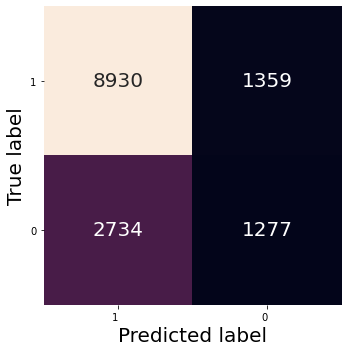

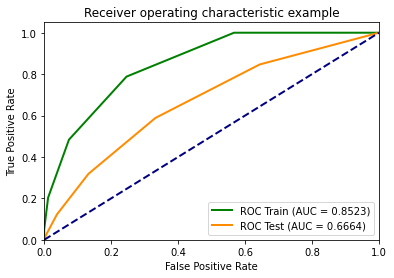

In [43]:
train_model(knn, X_train, y_train, X_test, y_test)

              train      test
metrics                      
AUC        1.000000  0.707635
Accuracy   0.999640  0.759091
Precision  1.000000  0.567833
Recall     0.998760  0.590626
f1-score   0.999379  0.579005
              precision    recall  f1-score   support

           0       0.84      0.82      0.83     10289
           1       0.57      0.59      0.58      4011

    accuracy                           0.76     14300
   macro avg       0.70      0.71      0.71     14300
weighted avg       0.76      0.76      0.76     14300

[[8486 1803]
 [1642 2369]]


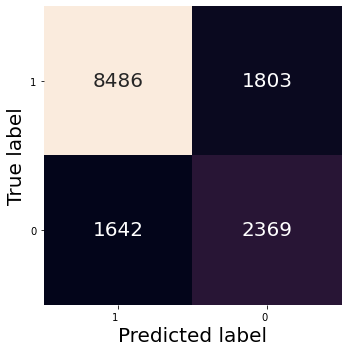

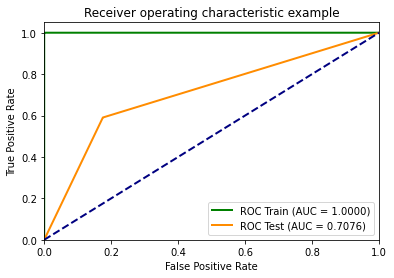

In [44]:
train_model(clf, X_train, y_train, X_test, y_test)

C:\Users\Haneesha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              train      test
metrics                      
AUC        0.741635  0.748081
Accuracy   0.736213  0.741119
Precision  0.600229  0.583922
Recall     0.270491  0.268013
f1-score   0.372925  0.367396
              precision    recall  f1-score   support

           0       0.76      0.93      0.84     10289
           1       0.58      0.27      0.37      4011

    accuracy                           0.74     14300
   macro avg       0.67      0.60      0.60     14300
weighted avg       0.71      0.74      0.71     14300

[[9523  766]
 [2936 1075]]


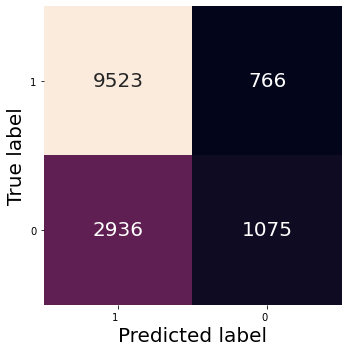

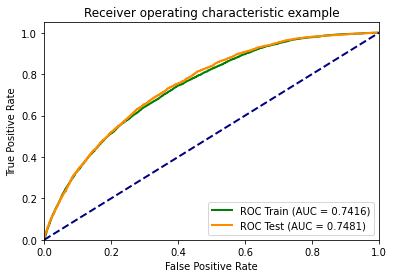

In [45]:
train_model(logRegressor, X_train, y_train, X_test, y_test)